# Examen práctico extraordinario

## Uso de la API del Covid19 con Pandas
La URL puede verse [aquí](https://api.covid19api.com/countries).

El primer paso para llevar a cabo este trabajo con los datos de la Covid19 es encontrar dichos datos. En la URL adjunta los encontramos en una Interfaz de Acceso Programable (API) que nos va a permitir trabajar con ellos.

## Instalación de librerías

In [1]:
!pip install pandas

## Configuración de Pandas

In [2]:
import pandas as pd

## Crear variable

In [3]:
url = 'https://api.covid19api.com/countries'

## Crear *dataframe*

In [4]:
df = pd.read_json(url)
df

,Country,Slug,ISO2
0,Falkland Islands (Malvinas),falkland-islands-malvinas,FK
1,Panama,panama,PA
2,Russian Federation,russia,RU
3,Turkmenistan,turkmenistan,TM
4,Guinea,guinea,GN
...,...,...,...
243,Guyana,guyana,GY
244,Hungary,hungary,HU
245,Kazakhstan,kazakhstan,KZ
246,Liberia,liberia,LR


## Exploración tabla

Aquí exploraremos la tabla para comprender mejor nuestros datos y qué podemos hacer con ellos.


In [5]:
df.head(6)

,Country,Slug,ISO2
0,Falkland Islands (Malvinas),falkland-islands-malvinas,FK
1,Panama,panama,PA
2,Russian Federation,russia,RU
3,Turkmenistan,turkmenistan,TM
4,Guinea,guinea,GN
5,Korea (South),korea-south,KR



Hemos utilizado la función `head()` para explorar los datos de la cabecera, los primeros datos que poseemos. Lo hemos hecho, igual que lo hicimos para que se leyesen los datos con JSON: `df` (o sea, el dataframe, los datos que estamos leyendo con JSON como explicamos antes) y dentro de este dataframe, la función `head()` y el argumento `(6)`: para que dentro de la cabecera nos muestre los 6 primeros valores. Al escribir una función, si usamos el tabulador, nos da opciones de qué valores podemos introducir en el paréntesis, pero también podríamos haberlo dejado vacío (es decir `df.head()`).


In [6]:
df.tail(2)

,Country,Slug,ISO2
246,Liberia,liberia,LR
247,Somalia,somalia,SO



Hemos hecho lo mismo que en el paso anterior con la cabecera, pero esta vez con la cola, los valores finales, especificando que se muestren los dos últimos.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  248 non-null    object
 1   Slug     248 non-null    object
 2   ISO2     248 non-null    object
dtypes: object(3)
memory usage: 5.9+ KB


Con la función `info()` nos explica los datos de la tabla. Hay 248 entradas (de 0 a 247, como ya explicamos), de ahí hay 3 columnas (porque esa cuarta es la numeración, no son datos de la tabla) y corresponden a \"Country\" (0), \"Slug\" (1) e \"ISO2\" (2): cada una tiene esos 248 valores no-nulos y tipo de datos = \"objeto\". También nos explicita del uso de memoria y que es un dataframe de pandas.


In [8]:
df['Country']

0      Falkland Islands (Malvinas)
1                           Panama
2               Russian Federation
3                     Turkmenistan
4                           Guinea
                  ...             
243                         Guyana
244                        Hungary
245                     Kazakhstan
246                        Liberia
247                        Somalia
Name: Country, Length: 248, dtype: object

Para que solo nos muestre valores concretos del dataframe, explicitamos qué queremos que nos muestre escribiéndolo entre `[]` (en este caso, también entrecomillado porque es texto literal, si no, Python no podría interpretarlo). En este caso, hemos escrito \"Country\", que, como vimos en el paso anterior, es una de las columnas del dataframe. Al ejecutarlo, solo nos muestra esa columna (los nombres de los países).


## Tiempo real

Ahora vamos a utilizar otros datos. Siguiendo con la temática de los datos de la Covid, vamos a ver los casos en tiempo real de tres países. Empezamos con los de España. Igual que hicimos con el primer enlace, en esta URL encontramos la API para los datos en tiempo real de España.

In [9]:
url_es = 'https://api.covid19api.com/country/spain/status/confirmed/live'
df_es = pd.read_json(url_es)
df_es

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-22 00:00:00+00:00
1,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-23 00:00:00+00:00
2,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-24 00:00:00+00:00
3,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-25 00:00:00+00:00
4,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-26 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...
883,Spain,ES,,,,40.46,-3.75,12613634,confirmed,2022-06-23 00:00:00+00:00
884,Spain,ES,,,,40.46,-3.75,12681820,confirmed,2022-06-24 00:00:00+00:00
885,Spain,ES,,,,40.46,-3.75,12681820,confirmed,2022-06-25 00:00:00+00:00
886,Spain,ES,,,,40.46,-3.75,12681820,confirmed,2022-06-26 00:00:00+00:00


Establecemos las equivalencias con `=` para nombrar la URL y el dataframe igual que explicamos en el caso anterior. Para diferenciarlo de los casos de todos los países con los que estábamos trabajando antes, los llamamos `_es`. Es para abreviar (es=España, así además evitamos la ñ) y no dejar espacios en blanco (no usamos guion medio porque Python lo interpretaría como un signo menos). Despues escribimos `df_es` y ejecutamos para que se visualice, según lo explicado ya anteriormente.


## Exploración
Una vez tenemos ese _dataframe_, exploraremos los datos tal como hicimos anteriormente.

In [10]:
df_es.columns

Index(['Country', 'CountryCode', 'Province', 'City', 'CityCode', 'Lat', 'Lon',
       'Cases', 'Status', 'Date'],
      dtype='object')

 Con la función `columns`, sabemos cuáles son las columnas de nuestro dataframe.


In [11]:
df_es.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Country      888 non-null    object             
 1   CountryCode  888 non-null    object             
 2   Province     888 non-null    object             
 3   City         888 non-null    object             
 4   CityCode     888 non-null    object             
 5   Lat          888 non-null    float64            
 6   Lon          888 non-null    float64            
 7   Cases        888 non-null    int64              
 8   Status       888 non-null    object             
 9   Date         888 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(6)
memory usage: 69.5+ KB


In [12]:
df_es.describe()

,Lat,Lon,Cases
count,8.880000e+02,888.00,8.880000e+02
mean,4.046000e+01,-3.75,4.092078e+06
std,7.109432e-15,0.00,3.947626e+06
min,4.046000e+01,-3.75,0.000000e+00
25%,4.046000e+01,-3.75,4.569650e+05
50%,4.046000e+01,-3.75,3.347512e+06
75%,4.046000e+01,-3.75,5.069291e+06
max,4.046000e+01,-3.75,1.268182e+07


 
 La función `describe()` nos devuelve algunos datos estadísticos estándar sobre nuestro dataframe, como el mínino y el máximo, el 25, 50 y 75%, etc. En este caso, solo mantiene las columnas \"lat\", \"lon\" y \"cases\" porque son las que contienen valores numéricos.La latitud y la longitud, como interpretación de los datos, no nos serviría en realidad.

In [13]:
df_es.set_index('Date')

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status
Date,,,,,,,,,
2020-01-22 00:00:00+00:00,Spain,ES,,,,40.46,-3.75,0,confirmed
2020-01-23 00:00:00+00:00,Spain,ES,,,,40.46,-3.75,0,confirmed
2020-01-24 00:00:00+00:00,Spain,ES,,,,40.46,-3.75,0,confirmed
2020-01-25 00:00:00+00:00,Spain,ES,,,,40.46,-3.75,0,confirmed
2020-01-26 00:00:00+00:00,Spain,ES,,,,40.46,-3.75,0,confirmed
...,...,...,...,...,...,...,...,...,...
2022-06-23 00:00:00+00:00,Spain,ES,,,,40.46,-3.75,12613634,confirmed
2022-06-24 00:00:00+00:00,Spain,ES,,,,40.46,-3.75,12681820,confirmed
2022-06-25 00:00:00+00:00,Spain,ES,,,,40.46,-3.75,12681820,confirmed


Explorando los datos, hemos llegado a la conclusión que lo más interesante para redactar una historia periodística serían la fecha y el número de casos (el resto de valores son siempre los mismos: país España con sus respectivas cordenadas y el estado de casos confirmados).

El primer paso para centrarnos en ellos es establecer \"date\" cómo índice, es decir la primera columna. Lo aplicamos con la función `set_index()` y entre `()` el valor de lo que queremos que se convierta en ese índice, en este caso la columna "Date", las fechas.

In [14]:
df_es.set_index('Date')['Cases']

Date
2020-01-22 00:00:00+00:00           0
2020-01-23 00:00:00+00:00           0
2020-01-24 00:00:00+00:00           0
2020-01-25 00:00:00+00:00           0
2020-01-26 00:00:00+00:00           0
                               ...   
2022-06-23 00:00:00+00:00    12613634
2022-06-24 00:00:00+00:00    12681820
2022-06-25 00:00:00+00:00    12681820
2022-06-26 00:00:00+00:00    12681820
2022-06-27 00:00:00+00:00    12681820
Name: Cases, Length: 888, dtype: int64

Una vez hemos establecido que \"date\" sea el índice, entre `[]` (como explicamos anteriormente) decimos que solo nos muestre \"Cases\", el número de casos, que es el otro dato que nos interesaba.

<AxesSubplot:title={'center':'Casos de Covid19 en España'}, xlabel='Date'>

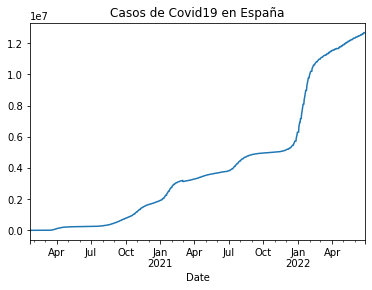

In [15]:
df_es.set_index('Date')['Cases'].plot(title="Casos de Covid19 en España")

Ya hemos establecido que en el dataframe hay un \"index\" que son las fechas y, dentro de él, queremos que solo muestre los valores del número de casos (entre `[]`, \"Cases\"). Sobre esto, vamos a crear una visualización con una nueva función: `plot()`. Para añadir la función a aquello, escribimos un punto y el nombre de `plot()`, siguiendo la lógica del resto de funciones que ya hemos empleado. Dentro del argumento, tenemos varias opciones (las visualizamos con el tabulador). En este caso, queremos que el gráfico que estamos creando tenga un título, así que escribimos `title` seguido del `=` (para establecer la equivalencia, lo que es el título que se mostrará es lo que viene a continuación) y entre comillas (porque es texto literal) cómo queremos que se llame nuestro gráfico.

El resultado es un gráfico de línea en el cual el eje x es el \"index\" que habíamos establecido, las fechas; y el eje de las y los valores que queríamos extraer de ahí, es decir, el nº de casos. Posee el título que explicitamos al escribir como argumento de `plot(title=\"Casos de Covid19 en España\")`.


## El caso de Italia

<AxesSubplot:title={'center':'Casos de Covid19 en Italia'}, xlabel='Date'>

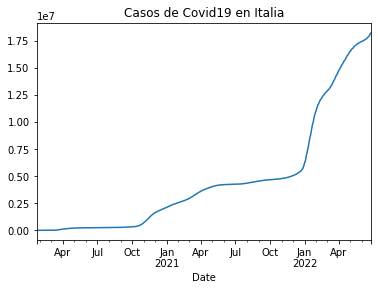

In [17]:
url_it = 'https://api.covid19api.com/country/italy/status/confirmed/live'
df_it = pd.read_json(url_it)
df_it.set_index('Date')['Cases'].plot(title="Casos de Covid19 en Italia")

Hemos hecho lo mismo que hicimos para España esta vez con los datos de Italia. Al nombrarlos, en lugar del `_es`, ponemos it (abreviatura de Italia) y el enlace a los datos corresponde a la API de Italia, en lugar de España. Además, para ahorrar pasos, después de nombrar la url y el df, directamente escribimos en un solo paso que establezca el index en \"Date\", dentro de ello solo use los valores \"Cases\" y con la función `plot()`, los muestre en el gráfico. Hemos dejado vacío el argumento, así que no hay título en este caso.

## El caso de Francia

<AxesSubplot:title={'center':'Casos de Covid19 en Francia'}, xlabel='Date'>

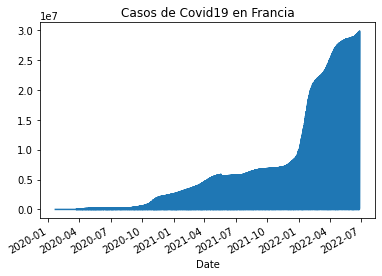

In [31]:
url_fr = 'https://api.covid19api.com/country/france/status/confirmed/live'
df_fr = pd.read_json(url_fr)
df_fr.set_index('Date')['Cases'].plot(title="Casos de Covid19 en Francia")

Como hicimos con Italia, escogemos el país Francia para ver sus datos, siguiendo los mismos pasos que acabamos de explicar. A la hora de nombrarlo, tras el guion bajo hemos escogido "fr" como abreviatura. Por algún motivo, el gráfico aparece en área. No he sido capaz de averiguar la causa.

## Comparativa

In [21]:
casos_fr = df_fr.set_index('Date')['Cases']
casos_it = df_it.set_index('Date')['Cases']
casos_es = df_es.set_index('Date')['Cases']

Ahora vamos a comparar los datos de los tres países. El primer paso es dar un nombre a los datos de cada uno de ellos una vez hemos seleccionado los datos que nos interesan (\"Date\" como índice y dentro de esto los valores de \"Cases\"). A cada dataframe lo llamamos `casos_` y la abreviatura que usamos en los pasos anteriores (es, it, mx).


In [22]:
casos_es

Date
2020-01-22 00:00:00+00:00           0
2020-01-23 00:00:00+00:00           0
2020-01-24 00:00:00+00:00           0
2020-01-25 00:00:00+00:00           0
2020-01-26 00:00:00+00:00           0
                               ...   
2022-06-23 00:00:00+00:00    12613634
2022-06-24 00:00:00+00:00    12681820
2022-06-25 00:00:00+00:00    12681820
2022-06-26 00:00:00+00:00    12681820
2022-06-27 00:00:00+00:00    12681820
Name: Cases, Length: 888, dtype: int64

Hemos escrito uno de ellos para que nos lo "imprima" y simplemente comprobar que está bien, como es el caso.

In [23]:
pd.concat([casos_es,casos_it,casos_fr],axis=1)

,Cases,Cases,Cases
Date,,,
2020-01-22 00:00:00+00:00,0.0,0.0,0
2020-01-22 00:00:00+00:00,0.0,0.0,0
2020-01-22 00:00:00+00:00,0.0,0.0,0
2020-01-22 00:00:00+00:00,0.0,0.0,0
2020-01-22 00:00:00+00:00,0.0,0.0,0
...,...,...,...
2022-06-27 00:00:00+00:00,12681820.0,18259261.0,37877
2022-06-27 00:00:00+00:00,12681820.0,18259261.0,4671
2022-06-27 00:00:00+00:00,12681820.0,18259261.0,85596


Queremos concatenar los datos de los tres dataframes. `pd.concat` significa concatenar objetos de pandas (que al principio del todo establecimos que íbamos a nombrar como `pd`), concatenar es la función que aplicamos. Como es una función, va seguida de su argumento entre `()`. La primera parte del argumento, entre `[]` los dataframes que queremos concatenar (los de los tres países con los nombres que les dimos en el paso anterior) y después, establecemos que el `axis=1`, es decir, el eje va a ser esa columna \"Date\", la primera porque la establecimos como índice. Que 1 sea \"columns\" es la manera de utilizar la función dentro de Python.

In [25]:
vs = pd.concat([casos_es,casos_it,casos_fr],axis=1)
vs

,Cases,Cases,Cases
Date,,,
2020-01-22 00:00:00+00:00,0.0,0.0,0
2020-01-22 00:00:00+00:00,0.0,0.0,0
2020-01-22 00:00:00+00:00,0.0,0.0,0
2020-01-22 00:00:00+00:00,0.0,0.0,0
2020-01-22 00:00:00+00:00,0.0,0.0,0
...,...,...,...
2022-06-27 00:00:00+00:00,12681820.0,18259261.0,37877
2022-06-27 00:00:00+00:00,12681820.0,18259261.0,4671
2022-06-27 00:00:00+00:00,12681820.0,18259261.0,85596


Llamamos a esa concatenación de los dataframes `vs` (por \"versus\"). Cuando lo escribimos solo se nos muestra. Hemos hecho bien la concatenación, como índice esta \"Date\" y después otras tres columnas con los casos de cada país. Pero todas se llaman \"Cases\" (que es como se llamaban en el dataframe de origen).


In [26]:
vs.columns

Index(['Cases', 'Cases', 'Cases'], dtype='object')

Con la función `columns` vemos que las tres se llaman "Cases" (dentro del Index que ya hemos explicado que son las fechas). La función también nos muestra el *Data Type*.

In [27]:
vs.columns = ['España','Italia','Francia']

Para cambiar el nombre de las columnas usamos `=`, como ya lo hemos usado en otras ocasiones. Entonces `vs.columns` (las columnas del dataframe vs, el concatenado, usando la función que explicamos antes) son `=` \"España\", \"Italia\" y \"México\" entre `[]`, igual que en el paso anterior aparecía tres veces la palabra \"Cases\".

<AxesSubplot:title={'center':'España vs Italia vs Francia'}, xlabel='Date'>

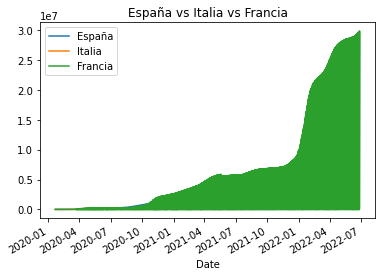

In [28]:
vs.plot(title="España vs Italia vs Francia")

Usamos la función `plot` sobre el *dataframe* `vs` para que se pinte un gráfico. Como argumento escribimos `title=` para introducir el título de la misma manera en que lo hicimos y explicamos al hacer los gráficos individuales de cada país. Lo propio es que pintara una línea por cada columna (excluyendo el índice, que es el eje): España, Italia y Francia, con su respectiva leyenda por colores.

### Problema
Como Francia ha aparecido inicialmente con área, ésta se ha mantenido, impidiendo ver el resto de datos. Continúo sin identificar el motivo. Para solucionar la visualización, trataré de mostrar el gráfico comparativo en área para los tres países.


<AxesSubplot:title={'center':'España vs Italia vs Francia'}, xlabel='Date'>

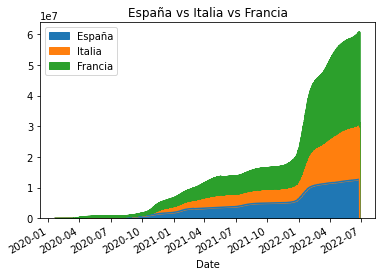

In [32]:
vs.plot(title="España vs Italia vs Francia", kind='area')

Ahora sí podemos visualizar los datos correctamente. Por defecto, al pintar el gráfico, había hecho un gráfico de líneas, pero Python también nos permite otros formatos. Para establecerlos, tenemos que escribir, dentro del argumento de la función `plot()`, `kind=` al tipo que queramos. Como también habíamos usado `title=`, lo escribimos a continuación seguido de una coma. En este caso hemos escogido \"area\".
